In [1]:
'''
SeizureNet replica (theory demonstration version)
Group 5 - Health machinae pro
"Note that I might change file contents anyhow in the future" -Veikka
'''

import scipy
import numpy as np
import math
import scipy.ndimage as ndimage
from scipy.fftpack import fft, ifft
import pandas as pd

'''
file = pd.read_excel("MOCK_DATA.xlsx")
samples = file.values
'''
samples = [[7, 1, 5, 0],
[9, 0, 6, 7],
[6, 6, 0, 5],
[5, 6, 9, 0],
[3, 1, 1, 4],
[2, 4, 7, 3],
[1, 5, 3, 5],
[5, 5, 4,7],
[3, 8, 2, 2],
[4, 5, 3, 1]]
'''
Comment the matrix and uncomment the file if you have one. You can create sample data on https://www.mockaroo.com/
by setting 4 columns of float numbers between values 0.1-5

'''

'\nComment the matrix and uncomment the file if you have one. You can create sample data on https://www.mockaroo.com/\nby setting 4 columns of float numbers between values 0.1-5\n\n'

In [2]:
#R^px20-dimensional feature map FT
#FT=log(Amplitude(F(X)))

#TODO: channel filter, channel looper, replace samples with data
'''
Channels used in the document: 
F P1 − F7; F7 − T3; T3 − T5; T5 − O1; 
F P2 − F8; F8 − T4; T4−T6; T6−O2; T3−C3; C3−CZ; CZ −C4; C4−T4; 
F P1−F3; F3−C3; C3−P3; P3−O1; 
F P2−F4; F4−C4; C4−P4; P4−O2
'''


#(F(X))
fx = np.abs(fft(samples))
#log(Amplitude(...))
#log doesn't take array as argument
FT_list = []
for i in fx:
    line = []
    for j in i:
        if j==0:
            line.append(j)
        else:
            line.append(math.log(2/20 * j))
    FT_list.append(line)
    
FT_list

[[0.26236426446749106,
  -1.4978661367769954,
  0.09531017980432493,
  -1.4978661367769954],
 [0.7884573603642703,
  -0.27236358772083596,
  -0.2231435513142097,
  -0.27236358772083596],
 [0.5306282510621705,
  -0.4971261366719334,
  -0.6931471805599453,
  -0.4971261366719334],
 [0.6931471805599453,
  -0.3269632337033319,
  -0.2231435513142097,
  -0.3269632337033319],
 [-0.10536051565782628,
  -1.0201104142632773,
  -2.3025850929940455,
  -1.0201104142632773],
 [0.47000362924573563,
  -0.6735368239833046,
  -1.6094379124341003,
  -0.6735368239833046],
 [0.336472236621213,
  -1.6094379124341003,
  -0.5108256237659905,
  -1.6094379124341003],
 [0.7419373447293773,
  -1.4978661367769954,
  -1.203972804325936,
  -1.4978661367769954],
 [0.4054651081081644,
  -0.4971261366719334,
  -0.6931471805599453,
  -0.4971261366719334],
 [0.26236426446749106,
  -0.8859784209659376,
  -2.3025850929940455,
  -0.8859784209659376]]

In [3]:
#Saliency map S1
#S1=G∗F^−1(exp(FT−H∗FT)+P)^2

#Gaussian kernel
GK = np.array([[1/16, 1/8, 1/16],
             [1/8, 1/4, 1/8],
             [1/16, 1/8, 1/16]])
#Local 3x3 averaging filter
af = np.array([[1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9],
             [1/9, 1/9, 1/9]])
#Data arrays dimensions and padding
FT = np.asarray(FT_list)
(dim_x, dim_y) = np.shape(FT)
FT_padded = scipy.pad(array=FT, pad_width=[1, 1], mode='constant', constant_values=0)
(dim_x_padded, dim_y_padded) = np.shape(FT_padded)

#Ft-H*FT
H_padded = np.zeros(FT_padded.shape)
for i in range (1, dim_x_padded-1):
    for j in range(1, dim_y_padded-1):
        entry = FT_padded[i-1:i+2, j-1:j+2]
        #print(np.shape(entry))
        valor = entry*af
        #print(valor)
        H_padded[i-1:i+2, j-1:j+2] = valor
#print(H_padded)
H = np.zeros(FT.shape)
for i in range (1, dim_x_padded-1):
    for j in range(1, dim_y_padded-1):
        H[i-1, j-1] = H_padded[i, j]
#print(H)
exp_FT_H_FT_P_2 = (np.exp((FT-(H*FT)+np.angle(FT))))**2
print(exp_FT_H_FT_P_2)

#Inverse Fourier
F1 = ifft(exp_FT_H_FT_P_2)

#Run through Gaussian kernel
F1_padded = scipy.pad(array=F1, pad_width=[1, 1], mode='constant', constant_values=0)
(dim_x_padded, dim_y_padded) = np.shape(F1_padded)
G_padded = np.zeros(F1_padded.shape)
for i in range (1, dim_x_padded-1):
    for j in range(1, dim_y_padded-1):
        entry = F1_padded[i-1:i+2, j-1:j+2]
        valor = entry*af
        G_padded[i-1:i+2, j-1:j+2] = valor
#print(G_padded)
G = np.zeros(F1.shape)
for i in range (1, dim_x_padded-1):
    for j in range(1, dim_y_padded-1):
        G[i-1, j-1] = G_padded[i, j]
#print(G)
S1 = G*F1
print(S1)
#blurred = np.zeros(samples.shape)
#blurred = ndimage.gaussian_filter(samples, sigma=1)
#blurred


[[  1.66434535  16.2627074    1.20755987  16.2627074 ]
 [  4.21549466 305.50717357 338.94338365 305.50717357]
 [  2.71471291 187.54414904 120.31623999 187.54414904]
 [  3.59493901 271.91844393 338.94338365 271.91844393]
 [432.67956652  55.24149663   1.64841718  55.24149663]
 [  2.43736518 125.8763576   12.0454789  125.8763576 ]
 [  1.91130433  12.0454789  181.91631375  12.0454789 ]
 [  3.90222848  16.2627074   34.92201254  16.2627074 ]
 [  2.16928246 187.54414904 120.31623999 187.54414904]
 [  1.66434535  76.46196342   1.64841718  76.46196342]]
[[8.70118239e+00+0.j 1.44897897e-03+0.j 6.10646272e+00-0.j
  1.44897897e-03+0.j]
 [6.32254545e+03+0.j 7.78074720e+02+0.j 4.98239946e+02-0.j
  7.78074720e+02-0.j]
 [1.72307492e+03+0.j 9.60424943e+01+0.j 4.41200731e+02-0.j
  9.60424943e+01-0.j]
 [5.45597926e+03+0.j 7.80962356e+02+0.j 2.81396614e+02-0.j
  7.80962356e+02-0.j]
 [2.06124306e+03+0.j 1.29019341e+03+0.j 7.28302624e+02+0.j
  1.29019341e+03+0.j]
 [4.92231757e+02+0.j 6.41082287e-01+0.j 3.90

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: ComplexWarning: Casting complex values to real discards the imaginary part


In [4]:
#Saliency map S2
#S2(i) =∑ρ∈[2,3,4](FTi−min([FTk,ρ])),∀k∈Ω

#TODO: separate the channels to get minimum value across channels
#Function to calculate min([FTk,ρ])
def ftkp(i):
    flattened = np.matrix.flatten(i)
    return min(flattened)

F2 = np.zeros(FT.shape)
F2_padded = scipy.pad(array=F2, pad_width=[1, 1], mode='constant', constant_values=0)
(dim_x_padded, dim_y_padded) = np.shape(F2_padded)
#Note that here we suppose that radius ρ equals 1
#Note that we're getting minimum value from each FTk,ρ that is padded, but the numbers are all negative so this doesn't matter
for i in range (1, dim_x_padded-1):
    for j in range(1, dim_y_padded-1):
        entry = FT[i-1:i+2, j-1:j+2]
        valor = ftkp(entry)
        F2[i-1, j-1] = valor
#print(F2)

S2 = np.zeros(FT.shape)
(dim_x, dim_y) = np.shape(FT)
for i in range (0, dim_x):
    for j in range(0, dim_y):
        min_val = np.subtract(FT[i, j],F2[i, j])
        #print(min_val)
        S2[i, j] = (min_val)
print(S2)

[[1.7602304  0.         1.59317632 0.        ]
 [1.48160454 0.42078359 0.47000363 0.22476255]
 [2.83321334 1.80545896 1.60943791 0.52298428]
 [2.99573227 1.97562186 2.07944154 0.69314718]
 [2.19722458 1.28247468 0.         0.5893275 ]
 [2.07944154 0.93590109 0.         0.93590109]
 [1.94591015 0.         1.09861229 0.        ]
 [3.04452244 0.80471896 1.09861229 0.        ]
 [2.7080502  1.80545896 1.60943791 0.38885228]
 [2.56494936 1.41660667 0.         0.        ]]


In [5]:
#from sklearn.preprocessing import normalize

#Data concatenation into RGB-like structure
#D = [|FT|, |S1|, |S2|]

#|FT| and its spectogram
ftmax, ftmin = FT.max(), FT.min()
ft_norm = (FT - ftmin)/(ftmax - ftmin)
ft_norm_rgb = (ft_norm*255).astype(int)
print(ft_norm_rgb)

#|S1| and its spectogram
s1max, s1min = S1.max(), S1.min()
s1_norm = (S1 - s1min)/(s1max - s1min)
s1_norm_rgb = (s1_norm*255).astype(int)
print(s1_norm_rgb)

#|S2| and its spectogram
s2max, s2min = S2.max(), S2.min()
s2_norm = (S2 - s2min)/(s2max - s2min)
s2_norm_rgb = (s2_norm*255).astype(int)
print(s2_norm_rgb)

#D and its spectogram
D = (ft_norm*s1_norm*s2_norm)
d_norm_rgb = (D*255).astype(int)
print(d_norm_rgb)

[[211  66 197  66]
 [255 167 171 167]
 [233 148 132 148]
 [247 162 171 162]
 [181 105   0 105]
 [228 134  57 134]
 [217  57 147  57]
 [251  66  90  66]
 [223 148 132 148]
 [211 116   0 116]]
[[  0   0   0   0]
 [255  31  20  31]
 [ 69   3  17   3]
 [220  31  11  31]
 [ 83  52  29  52]
 [ 19   0  15   0]
 [ 12   9   7   9]
 [  1   0   0   0]
 [ 69   3  17   3]
 [  6   0   6   0]]
[[147   0 133   0]
 [124  35  39  18]
 [237 151 134  43]
 [250 165 174  58]
 [184 107   0  49]
 [174  78   0  78]
 [162   0  92   0]
 [255  67  92   0]
 [226 151 134  32]
 [214 118   0   0]]
[[  0   0   0   0]
 [124   2   2   1]
 [ 59   1   4   0]
 [209  13   5   4]
 [ 42   9   0   4]
 [ 12   0   0   0]
 [  6   0   1   0]
 [  1   0   0   0]
 [ 54   1   4   0]
 [  4   0   0   0]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


<Figure size 432x288 with 0 Axes>

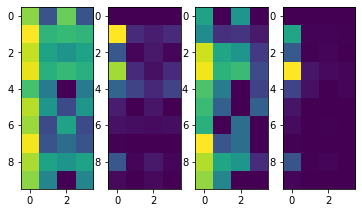

In [8]:
import matplotlib.pyplot as plt

#Spectograms visualisation
plt.figure()
f, spectograms = plt.subplots(1,4) 
spectograms[0].imshow(ft_norm_rgb)
spectograms[1].imshow(s1_norm_rgb)
spectograms[2].imshow(s2_norm_rgb)
spectograms[3].imshow(d_norm_rgb)
#plt.imshow(ft_norm_rgb)

In [7]:
'''
NOTE that running this cell requires you to have a matrix of at least few hundred lines (and optionally 4 columns) to work
See first cell to see how to obtain some data
'''

import random
#Multi-spectral Feature Learning

#Frequency channels 24Hx, 48Hz, 64Hz, 96Hz
channels = [0,1,2,3]
f = random.choice(channels)
#Window length in seconds
w = 10
#Window step size
o = 50

#Training subspace Dm={(Dmi,yi)|0≤i≤Nd}
def create_subspace(this_matrix, this_f,this_w,this_o):
    subspace = np.zeros((1, 30))
    #This process is repeated Ne = 3 times
    for i in range (1,3):
        #The position at highest can be = amount_of_samples_in_matrix - (3 * window length + window step size)
        position = random.randint(0,(len(D)-(3*(this_w+this_o))))
        k = 0
        for j in range(position, position+this_w):
            subspace[0, k] = (this_matrix[j, this_f]);
            #print(D[j, this_f])
            position = position + this_o;
            k = k+1
    return subspace

test = create_subspace(D,f,w,o)
#print(test)

#M-dimensional training dataset D={(Di,yi)|0≤i≤Nd}
#Here I'm creating a dataset with 200 samples
m = 200
data_D = np.zeros((m, 30))
for i in range(0,m):
    data_D[i] = create_subspace(D,f,w,o)
print(data_D)

ValueError: empty range for randrange() (0,-169, -169)

In [ ]:
from scipy.special import softmax
#Train SeizureNet parameterized by f(D,θ∗)

'''TODO'''
#Minimizing a training objective function θ∗= arg minθ LCE(y,f(D,θ))

'''TODO'''
#Cross-entropy loss LCE=∑Kk=1I(k=yi) log σ(Oe,yi)


'''TODO'''
#Combined logits produced by the ensemble Oe= 1/Ne∑Nee=1Ok
#Ok denotes the logits produced by an individual sub-network

#Indicator function I
def I(k):
    yi = k
    print(yi)
    return yi
#SoftMax operation σ(zi) = exp zi/∑Kk=1expzk
def logSoftMax(zi):
    return math.log(softmax(zi))